## Simulation Assignment

This notebook will contain the work for the assignment on simulation.
Let us start with our imports!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

We have a bunch of variables which we will be needing to create our simulation - let us set them up.

In [2]:
inc_0 = 80000
sigma = 0.13
persistance = 0.4
growth = 0.025
n_sims = 10000
np.random.seed(0)

Let us describe some of the variables and processes used in the simulation.

In [3]:
ln_inc = np.zeros(40)

In [4]:
ln_inc[0] = np.log(inc_0) + np.random.lognormal(0, sigma)

In [5]:
for t in range(2021, 2060):
    ln_inc[t - 2020] = (1 - persistance)*(ln_inc[0] + growth*(t - 2020)) + persistance*ln_inc[t - 2021] + np.random.lognormal(0, sigma)

In [6]:
np.exp(ln_inc)

array([ 281400.70400413,  819076.03398667, 1384125.05820007,
       2122149.40463163, 2398821.97900606, 1724433.82744738,
       1971189.45057464, 1815181.31007572, 1793842.44965377,
       1940191.51167495, 1960562.42521726, 2414797.0399305 ,
       2400927.56773083, 2226654.41182613, 2290600.88787929,
       2316534.96093213, 2800000.29992663, 2410283.49839957,
       2466131.47550935, 2181875.04621106, 1766244.72654231,
       2387965.50032487, 2818840.44361214, 2476315.08775911,
       3688209.43420233, 2622168.53125971, 2775363.19436844,
       2796831.1668534 , 3636822.2025407 , 4059818.73683361,
       3560914.37592192, 3534638.91313358, 3050354.84113575,
       2594247.98261729, 2963325.97551677, 3384725.68440006,
       4222222.43876279, 4662478.36547333, 3958747.41826966,
       3803982.45359455])

The above round of simulation was for one set of error values. We can see the salaries growing quite fast. Let us now do the simulation 40 times. Instead of first drawing the 10,000 sets of 40 normally distributed errors we just draw from the distribution each time, which gives us the same result but is computationally faster.

In [7]:
def simulate(inc_0, sigma, persistance, growth, n_sims):
    sims = np.zeros((n_sims, 40))
    for i in range(0, n_sims):
        ln_inc = np.zeros(40)
        ln_inc[0] = np.log(inc_0) + np.random.lognormal(0, sigma)
        for t in range(2021, 2060):
            ln_inc[t - 2020] = (1 - persistance)*(ln_inc[0] + growth*(t - 2020)) + persistance*ln_inc[t - 2021] + np.random.lognormal(0, sigma)
        sims[i] = np.exp(ln_inc)
    return sims

In [8]:
sims = simulate(inc_0, sigma, persistance, growth, n_sims)

In [9]:
year_vec = np.arange(2020, 2060)

Text(0, 0.5, 'Annual Salary')

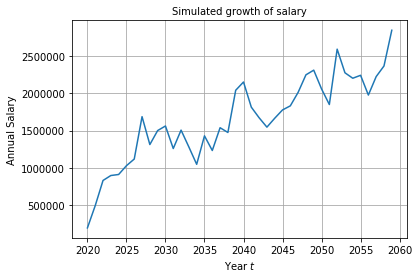

In [10]:
plt.plot(year_vec, sims[7])
# add grid
plt.grid(b=True, which='major', color='0.65', linestyle='-')
plt.title('Simulated growth of salary', fontsize=10)
plt.xlabel(r'Year $t$')
plt.ylabel(r'Annual Salary')

In the above case we plotted the 8th simulation. All the simulations more or less observe the same trend (as expected). Let us now plot the histogram of 50 bins.

(array([  5.,  24.,  48.,  82., 142., 215., 296., 462., 541., 617., 666.,
        687., 670., 676., 693., 624., 567., 490., 420., 373., 308., 268.,
        228., 178., 120., 113.,  90.,  71.,  70.,  77.,  41.,  38.,  19.,
         17.,  18.,   9.,   7.,   7.,   4.,   4.,   1.,   6.,   1.,   2.,
          2.,   0.,   0.,   1.,   1.,   1.]),
 array([149880.96425833, 154816.87974724, 159752.79523615, 164688.71072507,
        169624.62621398, 174560.5417029 , 179496.45719181, 184432.37268073,
        189368.28816964, 194304.20365856, 199240.11914747, 204176.03463639,
        209111.9501253 , 214047.86561422, 218983.78110313, 223919.69659205,
        228855.61208096, 233791.52756987, 238727.44305879, 243663.3585477 ,
        248599.27403662, 253535.18952553, 258471.10501445, 263407.02050336,
        268342.93599228, 273278.85148119, 278214.76697011, 283150.68245902,
        288086.59794794, 293022.51343685, 297958.42892577, 302894.34441468,
        307830.25990359, 312766.17539251, 317702.0

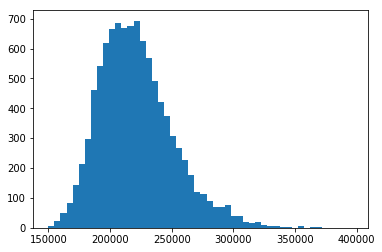

In [11]:
plt.hist(sims[:,0], 50)

According to our distribution, the entire class will earn more than 100,000, and none of the class will earn less than 70000. Let us verify this using numpy's where function. 

According to our distribution, x of the class will earn more than 100,000, and y of the class will earn less than 70000.

The distribution is log-normal, but isn't very far away from being a normal distribution.

In [12]:
len(np.where(sims[:,0] > 100000)[0])

10000

In [13]:
len(np.where(sims[:,0] < 70000)[0])

0

In [14]:
debt = 95000
n_years = np.zeros(10000)

In [15]:
def no_years(salary, debt):
    years = 0
    while debt > 0:
        years += 1
        debt = debt - 0.10 * salary[years]
    return (years + 1)

In [16]:
for i in range(0, 10000):
    n_years[i] = no_years(sims[i], debt)

(array([1.230e+02, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 9.868e+03,
        0.000e+00, 0.000e+00, 0.000e+00, 9.000e+00]),
 array([2. , 2.2, 2.4, 2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. ]),
 <a list of 10 Patch objects>)

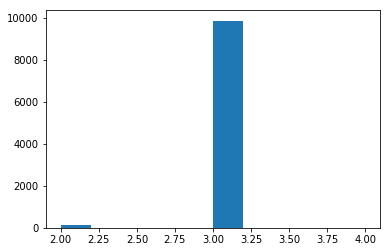

In [17]:
plt.hist(n_years)

The above histogram is the histogram of the number of years students in the program take to repay their debts. 
Let us do the same exercise with the updated values.

In [18]:
inc_0 = 90000
sigma = 0.17
persistance = 0.4
growth = 0.025
n_sims = 10000

In [19]:
sims = simulate(inc_0, sigma, persistance, growth, n_sims)

In [20]:
for i in range(0, 10000):
    n_years[i] = no_years(sims[i], debt)

(array([1.086e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 8.908e+03,
        0.000e+00, 0.000e+00, 0.000e+00, 6.000e+00]),
 array([2. , 2.2, 2.4, 2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. ]),
 <a list of 10 Patch objects>)

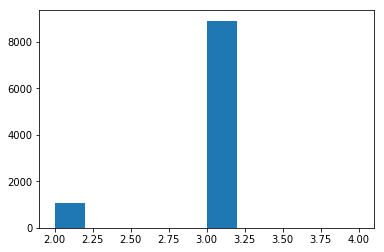

In [21]:
plt.hist(n_years)

We can see that we pay off the debt in less than 10 years for both the cases.